In [118]:
import numpy as np
from scipy.signal import butter
import scipy 
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter
import pandas as pd
plt.figure(figsize=(12, 7))

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

In [119]:
class ButterworthBandPassFilter(object):

    def __init__(self, f_low, f_high, Fs, order):
        self.f_low = f_low
        self.f_high = f_high
        self.Fs = Fs
        self.order = order

    def compute_normalized_freqs(self):
        # return the normalized frequencies using that formulas
        pass
        # print the normalized frequencies here, 
        # you can print it as a pandas data frame
        normalizer = lambda x: 2 * (x / self.Fs)
        w_low = normalizer(self.f_low)
        w_high = normalizer(self.f_high)
        return w_low, w_high
        
    def display_normalized_freqs(self):
        w_low, w_high = self.compute_normalized_freqs()
        df = pd.DataFrame.from_dict({
            "Frequence": ["fc1", "fc2"],
            "Frequency": [self.f_low, self.f_high],
            "Normalized Frequency": [w_low, w_high],
            
        })
        display(df)
    
    def compute_coefficients(self): # return b, a coefficients
        b, a = butter(self.order, [self.f_low, self.f_high], fs=self.Fs, btype='band')
        return b, a

    def generate_impulse_response(self, N=50):
        b, a = self.compute_coefficients()
        step = 1/self.Fs
        dirac = np.zeros(N)
        dirac[0] = 1
        T = np.arange(0, N * step, step=step)
        return T, lfilter(b, a, dirac)
    
    def plot_impulse_response(self, N=50):
        T, h = self.generate_impulse_response(N=N)
        plt.stem(T, h)
        

    def display_coefficients(self):
        #  build the pandas frame to show coefficients
        b, a = self.compute_coefficients()
        df = pd.DataFrame.from_dict(
            {
                "a": a,
                "b": b
            }
        )
        display(df)

    def plot_transfer_function(self, title='', plot_axis=True, show=True):
        b, a = self.compute_coefficients()
        # plt.figure(figsize=(12, 7))
        w, h = freqz(b, a, fs=self.Fs, worN=self.Fs)
        

        plt.plot(w, abs(h), label='Filtre:ordre={}'.format(self.order))
        plt.xlabel('Frequence')
        plt.ylabel('Amplitude')

        if plot_axis:
            # for the first frequency
            
            plt.axhline(y = 1/np.sqrt(2), color = 'g', linestyle = '--') 
            plt.axvline(x = self.f_low, color = 'g', linestyle = '--') 
            plt.axvline(x = self.f_high, color = 'g', linestyle = '--')
            plt.axhline(y=1, color='r', linestyle='--')
            plt.text(1, 1, 'y=1', size=14)
            plt.text(1, 1/np.sqrt(2), 'y=1/√2', size=14)
            plt.text(self.f_low+20, 0.5, 'x={}'.format(self.f_low), size=14, rotation=90)
            plt.text(self.f_high-100, 0.5, 'x={}'.format(self.f_high), size=14, rotation=90)
        if show:
            plt.show()

    @staticmethod
    def plot_filters(f_low, f_high, Fs, orders):
        filters = [
            ButterworthBandPassFilter(
                f_low=f_low, f_high=f_high, Fs=Fs, order=order
            )
            for order in orders    
        ]

        for filter in filters:
            filter.plot_transfer_function(show=False)
        plt.legend()
        plt.show()

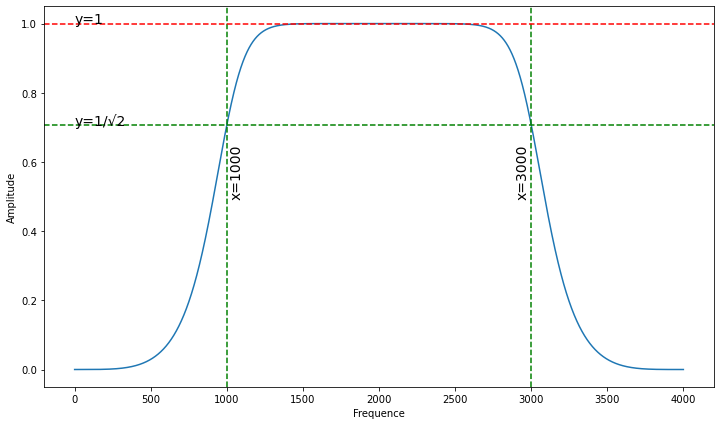

In [120]:

F_LOW = 1000
F_HIGH = 3000
FS = 8000
ORDER = 4
plt.figure(figsize=(12, 7))
f = ButterworthBandPassFilter(f_low=F_LOW, f_high=F_HIGH, Fs=FS, order=ORDER)

f.plot_transfer_function()

In [121]:
f.display_coefficients()

,a,b
0,1.000000e+00,0.093981
1,-4.440892e-16,0.000000
2,-2.775558e-16,-0.375923
3,2.220446e-16,0.000000
4,4.860288e-01,0.563885
5,-5.551115e-17,0.000000
6,-5.724587e-17,-0.375923
7,-1.734723e-18,0.000000
8,1.766480e-02,0.093981


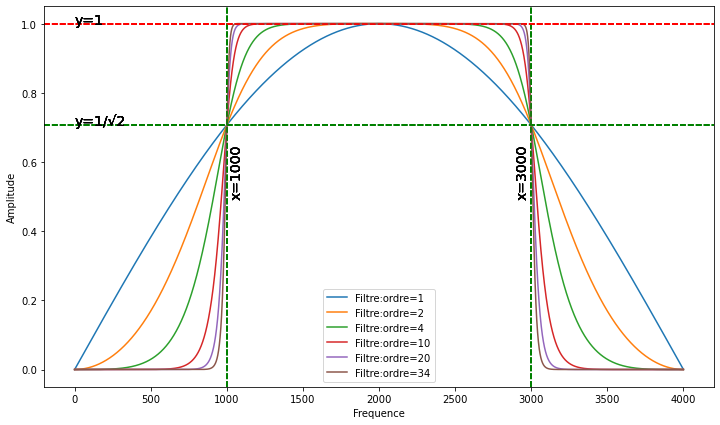

In [122]:
ORDERS = [1, 2, 4,  10, 20, 34]
plt.figure(figsize=(12, 7))
ButterworthBandPassFilter.plot_filters(F_LOW, F_HIGH, FS, ORDERS)

In [123]:
f.display_normalized_freqs()

,Frequence,Frequency,Normalized Frequency
0,fc1,1000,0.25
1,fc2,3000,0.75


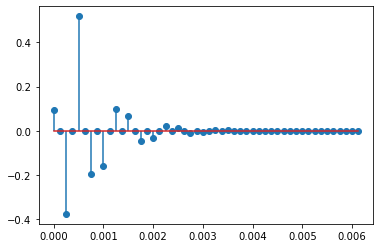

In [124]:
f.plot_impulse_response()

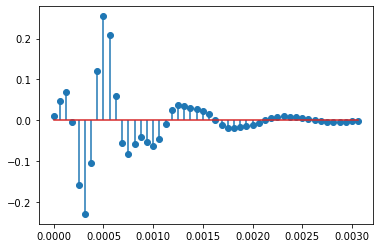

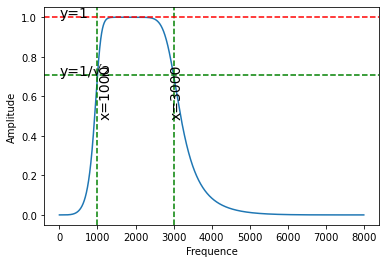

In [125]:
f2 = ButterworthBandPassFilter(f_low=F_LOW, f_high=F_HIGH, Fs=16000, order=4)
f2.plot_impulse_response()
plt.show()
f2.plot_transfer_function()

<StemContainer object of 3 artists>

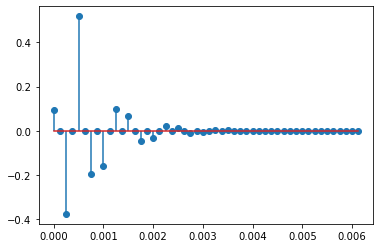

In [127]:
t, imp = f.generate_impulse_response(50)

plt.stem(t, imp)